# Extract OpenStreetMap (OSM) Road Network

This notebook demonstrates how to download OpenStreetMap road network data into a local geopackage (.gpkg), using the states of New Hampshire and Vermont as an example.

**Before running this notebook for the FIRST time**, complete the following steps:

1) Download the Anaconda distribution: [https://www.anaconda.com/download](https://www.anaconda.com/download)
2) Once installed, launch Anaconda Prompt
3) Create a new conda environment with necessary dependencies: `conda create -n FTOT_osm_env -c conda-forge osmnx networkx jupyter`

**Going forward**, whenever you want to run this notebook, complete the following steps:
1) Open Anaconda Prompt
2) Activate the environment: `conda activate FTOT_osm_env`
3) Optionally, navigate to your top-level C: drive for ease of file browsing in step 5: `cd C:\`
4) Launch Jupyter Notebook: `jupyter notebook`
5) Navigate through the files in your browser to open this Extract_OSM_Network.ipynb file
6) Edit the cells where prompted below and then click Run > Run All Cells in the menu above

*Note: This notebook only downloads the OSM road data. It does NOT further modify the spatial data for use as an FTOT network. See the bottom of the notebook for some guidance on next steps.*

## A. Setup

Import packages and specify osmnx package settings

In [6]:
import osmnx as ox
import networkx as nx

ox.settings.use_cache = True
ox.settings.log_console = True
ox.settings.max_query_area_size = 100000000000

**USER INPUT REQUIRED:** Specify a path for the final output geopackage.

In [18]:
output_path = r'C:\FTOT\scenarios\NH_VT_simplified_unclassified.gpkg'

**USER INPUT REQUIRED:** Specify OSM highway tags to extract. Some alternative examples are commented out below.

In [8]:
# cf = '["highway"~"motorway|motorway_link|trunk|trunk_link"]'
# cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link"]'
# cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link|secondary|secondary_link"]'
# cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link|secondary|secondary_link|tertiary|tertiary_link"]'
# cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link|secondary|secondary_link|tertiary|tertiary_link|unclassified"]'

cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link"]'

## B. Query Network

**USER INPUT REQUIRED:** Update the query string(s) to the area of interest. Test out and modify query strings by searching within OpenStreetMap online: https://www.openstreetmap.org/#map=7/42.045/-71.675.

In [ ]:
# Add additional lines for graphs as needed
G1 = ox.graph_from_place(query="New Hampshire, USA", simplify=False, retain_all=True, custom_filter=cf)
G2 = ox.graph_from_place(query="Vermont, USA", simplify=False, retain_all=True, custom_filter=cf)

# Combine all graphs from above
# Run this line if multiple graphs need to be combined
# If using only one graph, comment out this line, then replace G in the simplify_graph function in the next cell with the graph created above (e.g., G1)
G = nx.compose_all([G1, G2])

In [ ]:
# Simplify but can relax strictness by retaining attribute differences
# If there are other OSM attributes you wish to retain, add them to list below
G_all = ox.simplification.simplify_graph(G, edge_attrs_differ=["highway", "name", "oneway"])

In [19]:
# Save .gpkg
ox.io.save_graph_geopackage(G_all, output_path, encoding='utf-8', directed=False)

## Next Steps: ArcGIS Experience Required
The geopackage contains a line feature class called main.edges. You can open and view this feature class and its attribute table in ArcGIS Pro (see map below). The next step is to update the schema of the main.edges feature class to meet the requirements of an FTOT network. These modifications will require ArcGIS experience.

See the FTOT User Guide for more information. In addition, FTOT's [Preparing and Using a Custom Network](https://www.youtube.com/watch?v=48eWacfT8aI) video tutorial walks through an example of updating a schema, based on a road network downloaded from an Open GIS platform.

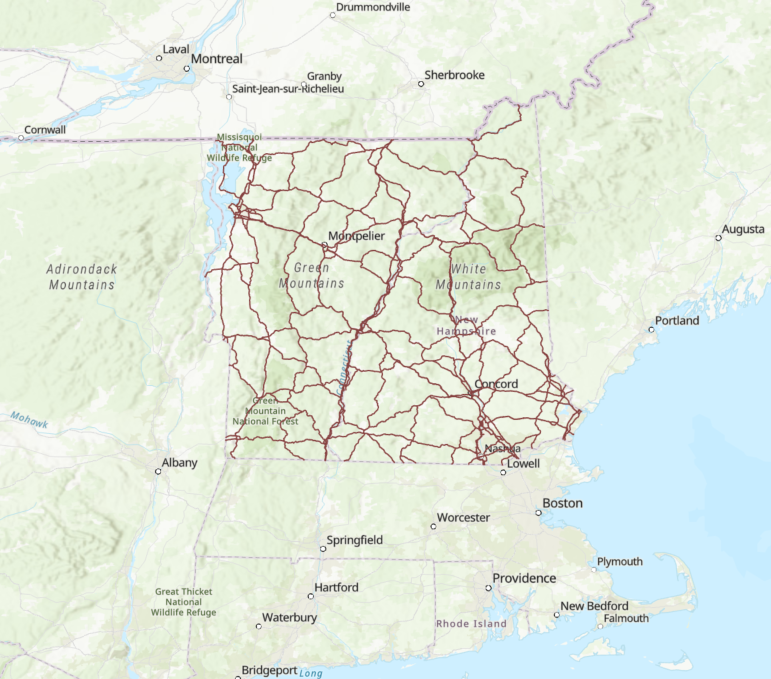